In [3]:
import matplotlib.pyplot as plt
import os
from pathlib import Path
import numpy as np 
import glob

In [43]:
path = os.getcwd()
list_folders = [f.path for f in os.scandir(path) if f.is_dir()]
ISTELL_results_list=[]
ISTELL_simons = np.loadtxt(os.path.join(path,"ISTELL_Simons/R2history_K21500_nphi64_ntheta64.txt"),usecols=0)
ISTELL_simons_vol_eff = np.loadtxt(os.path.join(path,"ISTELL_Simons/eff_vol_history_K21500_nphi64_ntheta64.txt"),usecols=0)

for folder in list_folders:
    MSE_paths = glob.glob(os.path.join(folder, "*/R2history_*"))
    
    if len(MSE_paths) != 0:
        print(MSE_paths)
        for path in MSE_paths:
            ISTELL_results_list.append(np.loadtxt(path,usecols=0))


['/home/madeira/ISTELL_with_MAGPIE/ISTELL_polarization_study/all_polarizations/R2history_K8060_nphi64_ntheta64.txt', '/home/madeira/ISTELL_with_MAGPIE/ISTELL_polarization_study/face_only/R2history_K8060_nphi64_ntheta64.txt', '/home/madeira/ISTELL_with_MAGPIE/ISTELL_polarization_study/face_corner/R2history_K8060_nphi64_ntheta64.txt', '/home/madeira/ISTELL_with_MAGPIE/ISTELL_polarization_study/PM4STELL/R2history_K8060_nphi64_ntheta64.txt', '/home/madeira/ISTELL_with_MAGPIE/ISTELL_polarization_study/face_edge/R2history_K8060_nphi64_ntheta64.txt']
['/home/madeira/ISTELL_with_MAGPIE/ISTELL_with_spacing/face_only/R2history_K5900_nphi64_ntheta64.txt', '/home/madeira/ISTELL_with_MAGPIE/ISTELL_with_spacing/PM4STELL/R2history_K5900_nphi64_ntheta64.txt']


0 621
1 621
2 621
3 621
4 621
5 296
6 296


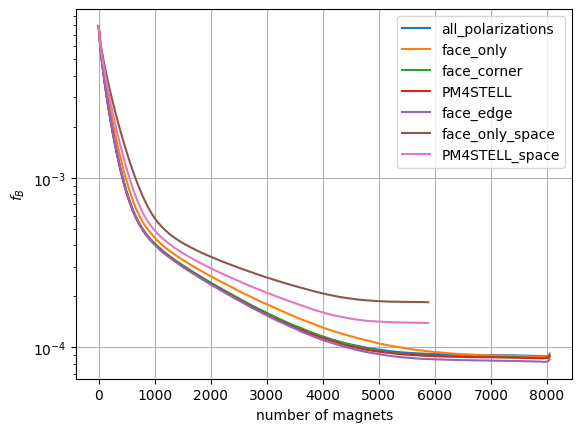

In [44]:
plt.figure()
plt.xlabel('number of magnets')
plt.ylabel(r'$f_B$')

for i in range(len(ISTELL_results_list)):
    print(i,len(ISTELL_results_list[i]))
    if i <5:
        iterations = np.linspace(0, 8060, len(ISTELL_results_list[i]), endpoint=False)
        plt.semilogy(iterations, ISTELL_results_list[i])
    elif i <7:
        iterations = np.linspace(0, 5900, len(ISTELL_results_list[i]), endpoint=False)
        plt.semilogy(iterations, ISTELL_results_list[i])
        
plt.legend(['all_polarizations','face_only','face_corner','PM4STELL','face_edge','face_only_space','PM4STELL_space'])
plt.grid()

0 621
1 621
2 621
3 621
4 621
5 296
6 296


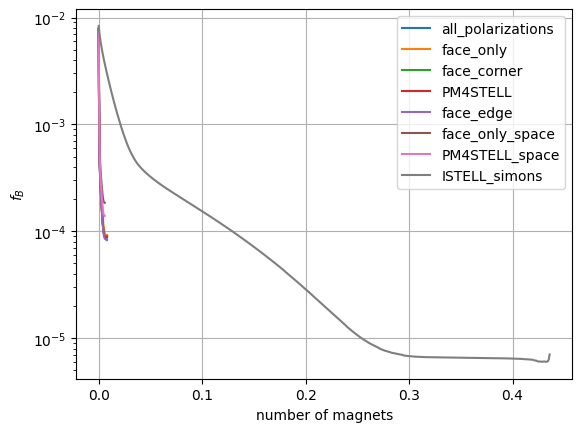

In [50]:
plt.figure()
plt.xlabel('number of magnets')
plt.ylabel(r'$f_B$')

mu0 = 4 * np.pi * 1e-7
Bmax = 1.465
#vol_eff = np.sum(np.sqrt(np.sum(m_history ** 2, axis=1)), axis=0) * mu0 * 2 * s.nfp / Bmax

for i in range(len(ISTELL_results_list)):
    print(i,len(ISTELL_results_list[i]))
    if i <5:
        iterations = np.linspace(0, 8060, len(ISTELL_results_list[i]), endpoint=False)
        vol_eff = iterations*0.01**3
        plt.semilogy(vol_eff, ISTELL_results_list[i])
    elif i <7:
        iterations = np.linspace(0, 5900, len(ISTELL_results_list[i]), endpoint=False)
        vol_eff = iterations*0.01**3
        plt.semilogy(vol_eff, ISTELL_results_list[i])

magnet_vol = 2*np.pi**2*0.46*(0.25**2-0.12**2)
print(magnet_vol)
magnet_vol_list = np.linspace(0, magnet_vol, len(ISTELL_simons), endpoint=False)
plt.semilogy(magnet_vol_list, ISTELL_simons)

                
plt.legend(['all_polarizations','face_only','face_corner','PM4STELL','face_edge','face_only_space','PM4STELL_space','ISTELL_simons'])
plt.grid()